In [1]:
from sqlalchemy import * # package providing unified access to various databases
from sqlalchemy.orm import *
import os                # for checking existence/removing of a file
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///create.db",echo=False)
session = Session(engine)

%load_ext sql
%sql sqlite:///create.db

  Universityid           Name                   Email Evalution  Total_Score
0     s3002428      Hanna Day  s3002428@leidenuniv.nl   Pending         46.0
1     s3003252     Ellie Wolf  s3003252@leidenuniv.nl   Pending         40.1
2     s3003316  Reiter Rogers  s3003316@leidenuniv.nl   Pending         35.7
3     s3004195    Cora Miller  s3004195@leidenuniv.nl   Pending         25.8
4     s3006578   Mary Mcguire  s3006578@leidenuniv.nl   Pending         44.8
  Universityid       Name                   Email Evalution  Total_Score
0     s3002428  Hanna Day  s3002428@leidenuniv.nl   Pending         46.0


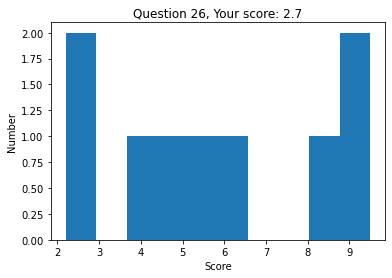

In [3]:
#return a dataframe of student summary table
def studentSumDF():
    stu_sum = pd.read_sql("""
SELECT Universityid, Name, Email, Evaluation_finished AS Evalution, SUM(Value) AS Total_Score
FROM Students
INNER JOIN Assignment USING(Universityid)
INNER JOIN Task USING (Taskid)
INNER JOIN Submission USING (Assignmentid)
INNER JOIN Score USING (Submissionid)
GROUP BY Universityid
""", engine)
    stu_sum.loc[stu_sum["Evalution"] != 0, "Evalution"] = "Finished"
    stu_sum.loc[stu_sum["Evalution"] == 0, "Evalution"] = "Pending"
    
    return(stu_sum)

#return a row of a single student summary table
def singleStudentSumDF(Universityid):
    stu_sum = studentSumDF()
    stu_sing = stu_sum[stu_sum['Universityid'] == Universityid]
    
    return(stu_sing)

#return a chart showing score distribution of a specified question 
def scoreChart(Universityid, Questionid):
    a = pd.read_sql("""SELECT Students.Universityid, Students.Name, Students.Email, Task.Taskid, Submission.Submissionid,
    Score.Value AS Score, Answer.Answerid, Answer.Questionid, Question.Title
        FROM Students
        INNER JOIN Assignment USING (Universityid)
        INNER JOIN Task USING (Taskid)
        INNER JOIN Submission USING (Assignmentid)
        INNER JOIN Score USING (Submissionid)
        INNER JOIN Answer USING (Answerid)
        INNER JOIN Question USING (Questionid)""", engine)
 
    a = a[a['Questionid']== Questionid]
    score = a.loc[a['Universityid'] == Universityid]['Score'][0]
    
    plt.hist(a['Score'])
    plt.title('Question ' + str(Questionid) + ', Your score: ' + str(score))
    plt.xlabel('Score')
    plt.ylabel('Number')
    plt.show()

print(studentSumDF().head())
print(singleStudentSumDF('s3002428'))
scoreChart('s3015725', 26)